In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

interactive digital board 별 전체 갯수: 6154, is_converted 갯수: 259, is_converted 비율: 4.21%
vrf 별 전체 갯수: 5640, is_converted 갯수: 524, is_converted 비율: 9.29%
multi-split 별 전체 갯수: 3674, is_converted 갯수: 323, is_converted 비율: 8.79%
video wall signage 별 전체 갯수: 2029, is_converted 갯수: 358, is_converted 비율: 17.64%
etc. 별 전체 갯수: 2018, is_converted 갯수: 92, is_converted 비율: 4.56%
led signage 별 전체 갯수: 1895, is_converted 갯수: 310, is_converted 비율: 16.36%
interactive signage 별 전체 갯수: 1862, is_converted 갯수: 312, is_converted 비율: 16.76%
single-split 별 전체 갯수: 1569, is_converted 갯수: 88, is_converted 비율: 5.61%
rac 별 전체 갯수: 1447, is_converted 갯수: 71, is_converted 비율: 4.91%
oled signage 별 전체 갯수: 1350, is_converted 갯수: 159, is_converted 비율: 11.78%


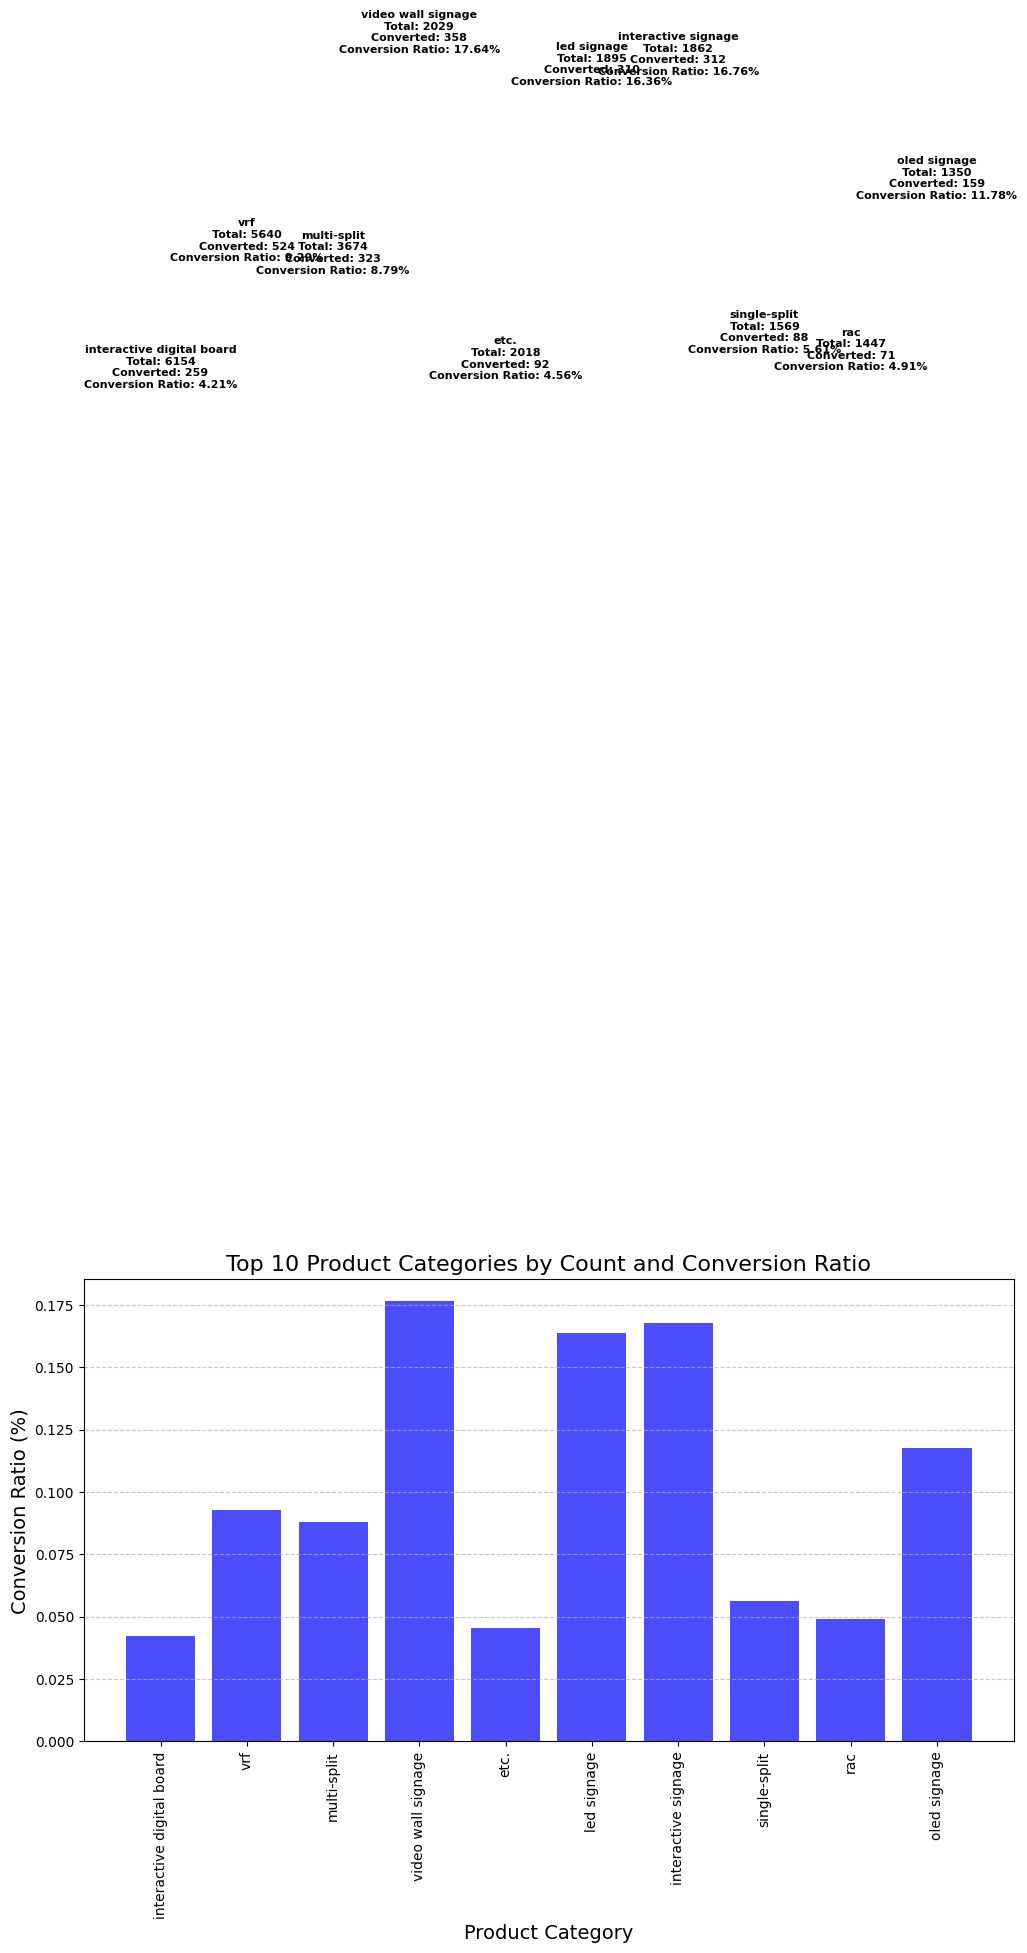

In [15]:
df_product_category = df.dropna(subset=['product_category'])

total_counts_product_category = df_product_category.groupby('product_category')['is_converted'].count().reset_index()
converted_counts_product_category = df_product_category.groupby('product_category')['is_converted'].sum().reset_index()
ratio_df_product_category = pd.merge(total_counts_product_category, converted_counts_product_category, on='product_category', how='left')
ratio_df_product_category['conversion_ratio'] = ratio_df_product_category['is_converted_y'] / ratio_df_product_category['is_converted_x']

top_10_product_category = ratio_df_product_category.nlargest(10, 'is_converted_x')

for index, row in top_10_product_category.iterrows():
    total = int(row['is_converted_x'])
    converted = int(row['is_converted_y'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['product_category']} 별 전체 갯수: {total}, is_converted 갯수: {converted}, is_converted 비율: {ratio:.2f}%")

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_product_category['product_category'], top_10_product_category['conversion_ratio'], color='blue', alpha=0.7)
plt.title('Top 10 Product Categories by Count and Conversion Ratio', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, label in zip(bars, top_10_product_category['product_category']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f"{label}\nTotal: {int(top_10_product_category[top_10_product_category['product_category'] == label]['is_converted_x'])}\nConverted: {int(top_10_product_category[top_10_product_category['product_category'] == label]['is_converted_y'])}\nConversion Ratio: {top_10_product_category[top_10_product_category['product_category'] == label]['conversion_ratio'].values[0]*100:.2f}%",
             ha='center', va='bottom', fontsize=8, color='black', weight='bold')

plt.show()
